In [ ]:
import pandas as pd 
import numpy as np 
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/BankChurners.csv")

In [ ]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [ ]:
from sklearn import preprocessing
le= preprocessing.LabelEncoder()
data['Attrition_Flag']=le.fit_transform(data['Attrition_Flag'])

In [ ]:
x = pd.DataFrame(data[["Credit_Limit", "Avg_Utilization_Ratio", "Attrition_Flag"]])  

In [ ]:
x

,Credit_Limit,Avg_Utilization_Ratio,Attrition_Flag
0,12691.0,0.061,1
1,8256.0,0.105,1
2,3418.0,0.000,1
3,3313.0,0.760,1
4,4716.0,0.000,1
...,...,...,...
10122,4003.0,0.462,1
10123,4277.0,0.511,0
10124,5409.0,0.000,0
10125,5281.0,0.000,0


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
x.iloc[:, [0]] = MinMaxScaler().fit_transform(x.iloc[:, [0]])

In [ ]:
x

,Credit_Limit,Avg_Utilization_Ratio,Attrition_Flag
0,0.340190,0.061,1
1,0.206112,0.105,1
2,0.059850,0.000,1
3,0.056676,0.760,1
4,0.099091,0.000,1
...,...,...,...
10122,0.077536,0.462,1
10123,0.085819,0.511,0
10124,0.120042,0.000,0
10125,0.116172,0.000,0


In [ ]:
from sklearn.model_selection import train_test_split

X= x.iloc[:, [0,1]].values  
Y= x.iloc[:, [2]].values  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# relu = rectified linear unit 
mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(3),activation='relu')
mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
mlp.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8334978611385324

In [ ]:
# logistic 
mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(3),activation='logistic')
mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
mlp.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8334978611385324

In [ ]:
# tanh
mlp = MLPClassifier(max_iter=500, hidden_layer_sizes=(3),activation='tanh')
mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
mlp.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8334978611385324

Text(42.0, 0.5, 'Truth')

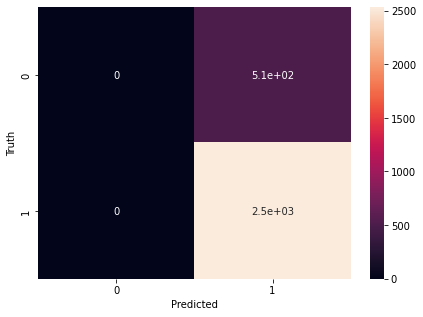

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Evaluation Rubrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test,pred)

array([[   0,  506],
       [   0, 2533]])

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       506
           1       0.83      1.00      0.91      2533

    accuracy                           0.83      3039
   macro avg       0.42      0.50      0.45      3039
weighted avg       0.69      0.83      0.76      3039



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
from sklearn.model_selection import train_test_split

X= x.iloc[:, [0]].values  
Y= x.iloc[:, [1]].values  
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

In [ ]:
mlp = MLPRegressor(max_iter=500, hidden_layer_sizes=(3),activation='logistic')
mlp.fit(X_train,y_train)
pred=mlp.predict(X_test)
mlp.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.21696444741243648

For this dataset, MLP is better utilised for classification